In [1]:
import numpy
from scipy.signal import correlate
import numpy as np 
import matplotlib.pyplot as plt
plt.ion()
# Loads nicard and scope
manager.startModule('logic','cavitylogic')
import glob

In [2]:
filenames = glob.glob('./*.dat')
print(filenames)
fileNum=3
#cavitylogic._load_full_sweep(filepath='', filename=filenames[fileNum])

['.\\2017-08-15_144400_full_sweep_data_calibrationOfStage.dat', '.\\2017-08-15_150436_full_sweep_data_calibration2.dat', '.\\2017-08-15_151042_full_sweep_data.dat', '.\\2017-08-15_151505_full_sweep_data.dat', '.\\2017-08-15_151553_full_sweep_data.dat', '.\\2017-08-15_151659_full_sweep_data.dat']


In [3]:
# Load datasets, taking mean of 100 values in each table row
A = numpy.loadtxt("2017-08-15_151553_full_sweep_data.dat")[1]
B = numpy.loadtxt("2017-08-15_151505_full_sweep_data.dat")[1]

A = np.split(A,2)[0][100000:]
B = np.split(B,2)[0][100000:]


In [4]:
low, high = 200000,300000

In [5]:
Atest = A
Btest = A

nsamples = Atest.size
Btest_sam = 0.05 * np.random.normal(size=(nsamples,))

time_shift = 26045
Atest = numpy.roll(Atest, time_shift)

Btest = Btest + Btest_sam

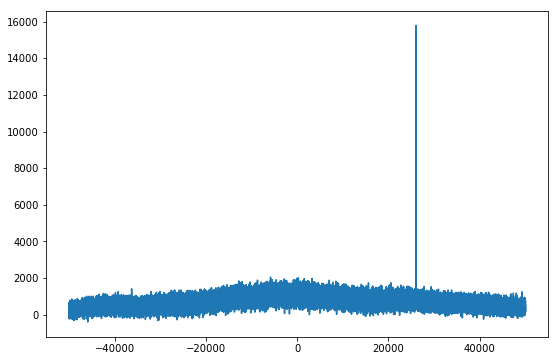

In [6]:
recovered_time_shift = cavitylogic.find_phase_difference(signal_a=Atest,signal_b=Btest,low=low,high=high,show=True)

In [7]:
print("Added time shift: {}".format(time_shift))
print("Recovered time shift: {}".format(recovered_time_shift))


Added time shift: 26045
Recovered time shift: 26045


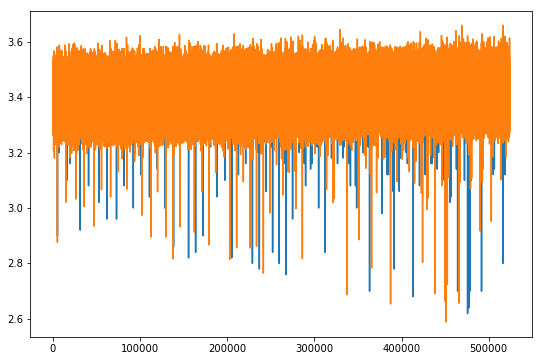

In [8]:
plt.plot(Atest,'-',Btest,'-')
plt.show()

In [9]:
Btest = Btest - Btest_sam
Btest = numpy.roll(Btest, recovered_time_shift)


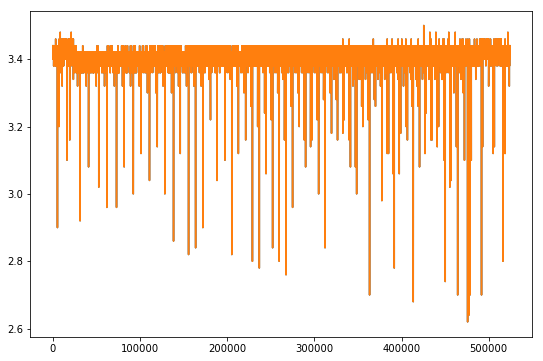

In [10]:
plt.plot(Atest,'-',Btest,'-')
plt.show()